In [16]:
library(ggplot2)
library(gplots)
library(rattle)
library(rpart.plot)
library(RColorBrewer)

## Read the csv file
BANK<-read.csv("BANK_ATM_DATA.csv",header = TRUE,sep = ',')
head(BANK)

Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
Loading required package: rpart


,ATM_TON,ATM_TOFF,POS_T,CARDS,ATM_TRAN,POS_TRAN,ATM_AMT,POS_AMT
1,1832,804,2709,6530298,12066286,277161,22964.8,450.3
2,1843,806,2736,6653052,12170249,306454,22543.1,522.9
3,1860,812,2759,6787984,11683010,281096,29795.7,451.7
4,1866,825,2762,6932458,11913974,289493,24490.7,452.7
5,1888,840,2756,7068870,11949923,337251,23855.6,547.2
6,1930,827,2773,7214644,12197975,311189,23825.6,491.2


In [2]:
## Include relevant variables
## Sum up the Onsite and Offsite ATM
BANK <- data.frame(c(BANK$ATM_TON+BANK$ATM_TOFF),BANK$CARDS,BANK$ATM_TRAN,BANK$ATM_AMT)
colnames(BANK) <- c("ATM_MACHINE","TOTAL_CARDS","ATM_TRAN","ATM_AMT")
head(BANK)

,ATM_MACHINE,TOTAL_CARDS,ATM_TRAN,ATM_AMT
1,2636,6530298,12066286,22964.8
2,2649,6653052,12170249,22543.1
3,2672,6787984,11683010,29795.7
4,2691,6932458,11913974,24490.7
5,2728,7068870,11949923,23855.6
6,2757,7214644,12197975,23825.6


In [3]:
## Create Train & Test Dataset
BANK_train<-sample(BANK[1:40,])
BANK_test<-sample(BANK[41:50,])

    ATM_TRAN         ATM_MACHINE      ATM_AMT       TOTAL_CARDS      
 Min.   : 6340901   Min.   :2636   Min.   :19905   Min.   : 6530298  
 1st Qu.: 8114410   1st Qu.:3313   1st Qu.:23854   1st Qu.: 7535884  
 Median : 9806348   Median :4274   Median :27529   Median : 8878174  
 Mean   :10007711   Mean   :4448   Mean   :29211   Mean   : 9262243  
 3rd Qu.:12085777   3rd Qu.:5392   3rd Qu.:32822   3rd Qu.:10828323  
 Max.   :13139184   Max.   :6639   Max.   :42439   Max.   :13156755  

,ATM_TRAN,ATM_MACHINE,ATM_AMT,TOTAL_CARDS
ATM_TRAN,1.0000000,0.2823353,0.6388598,0.4098925
ATM_MACHINE,0.2823353,1.0000000,0.8872908,0.9811313
ATM_AMT,0.6388598,0.8872908,1.0000000,0.9329924
TOTAL_CARDS,0.4098925,0.9811313,0.9329924,1.0000000


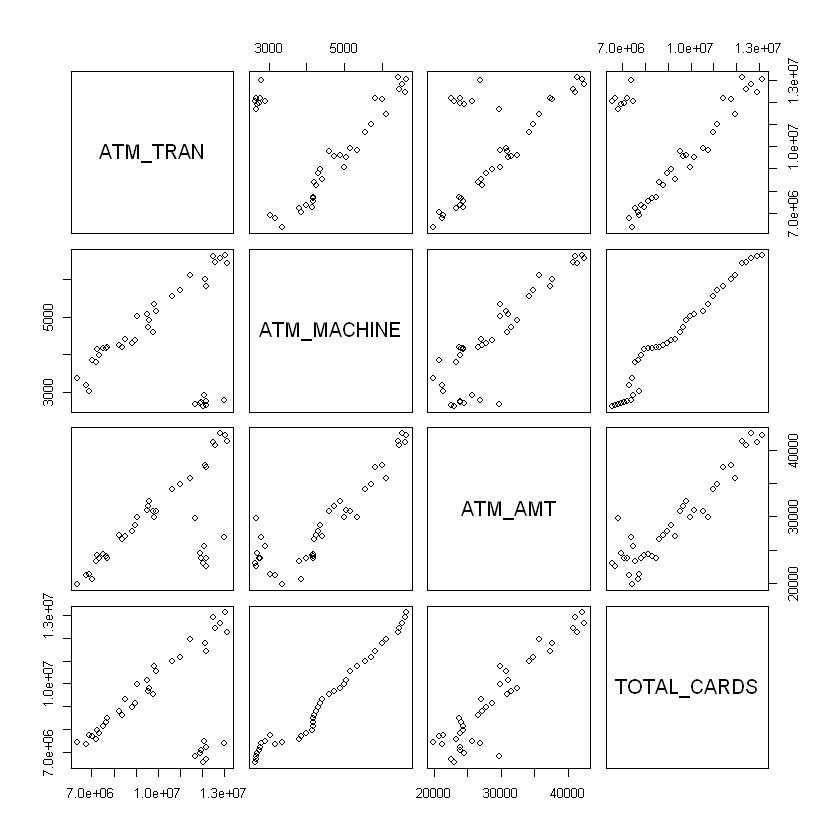

In [4]:
## Collecting stats of the Training Dataset
summary(BANK_train)
cor(BANK_train)
pairs(BANK_train)

In [5]:
## Model 1
## Linear model to find the ATM amount based on other available variables
m_train1 <- lm(ATM_AMT ~ ATM_MACHINE + TOTAL_CARDS + ATM_TRAN, data = BANK_train)
summary(m_train1)


Call:
lm(formula = ATM_AMT ~ ATM_MACHINE + TOTAL_CARDS + ATM_TRAN, 
    data = BANK_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2825.4  -646.3    20.8   644.6  5555.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.765e+03  1.787e+03  -1.548   0.1304    
ATM_MACHINE  2.247e+00  1.298e+00   1.731   0.0921 .  
TOTAL_CARDS  1.157e-03  8.820e-04   1.312   0.1978    
ATM_TRAN     1.125e-03  1.629e-04   6.909 4.33e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1475 on 36 degrees of freedom
Multiple R-squared:  0.9534,	Adjusted R-squared:  0.9495 
F-statistic: 245.5 on 3 and 36 DF,  p-value: < 2.2e-16


In [6]:
## Model 2
## Try to create more precise model compaired to the previous model
m_train2 <- lm(ATM_AMT ~ ATM_MACHINE + ATM_TRAN, data = BANK_train)
summary(m_train2)


Call:
lm(formula = ATM_AMT ~ ATM_MACHINE + ATM_TRAN, data = BANK_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2537.6  -708.6  -123.7   533.3  5428.1 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.073e+03  1.248e+03  -0.859    0.396    
ATM_MACHINE  3.932e+00  1.939e-01  20.283  < 2e-16 ***
ATM_TRAN     1.278e-03  1.147e-04  11.142 2.22e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1489 on 37 degrees of freedom
Multiple R-squared:  0.9512,	Adjusted R-squared:  0.9485 
F-statistic: 360.3 on 2 and 37 DF,  p-value: < 2.2e-16


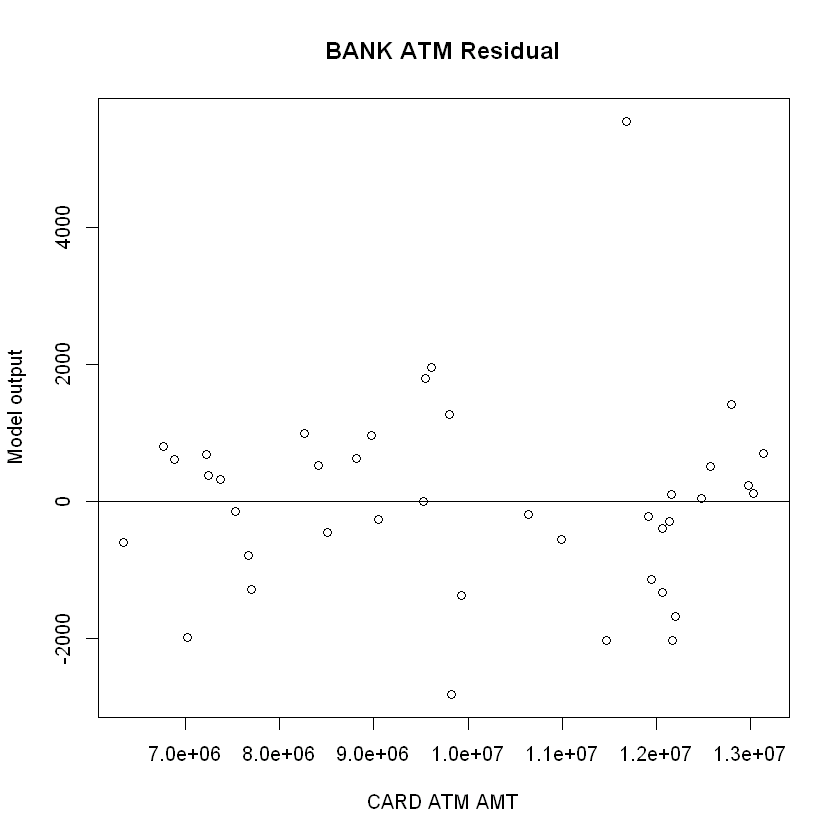

In [7]:
## Plotting Residual for Model 1
vResidual1 <- resid(m_train1)
plot(BANK_train$ATM_MACHINE + BANK_train$ATM_TRAN, vResidual1, 
     xlab = "CARD ATM AMT", ylab = "Model output",
     main = "BANK ATM Residual")
abline(0,0)

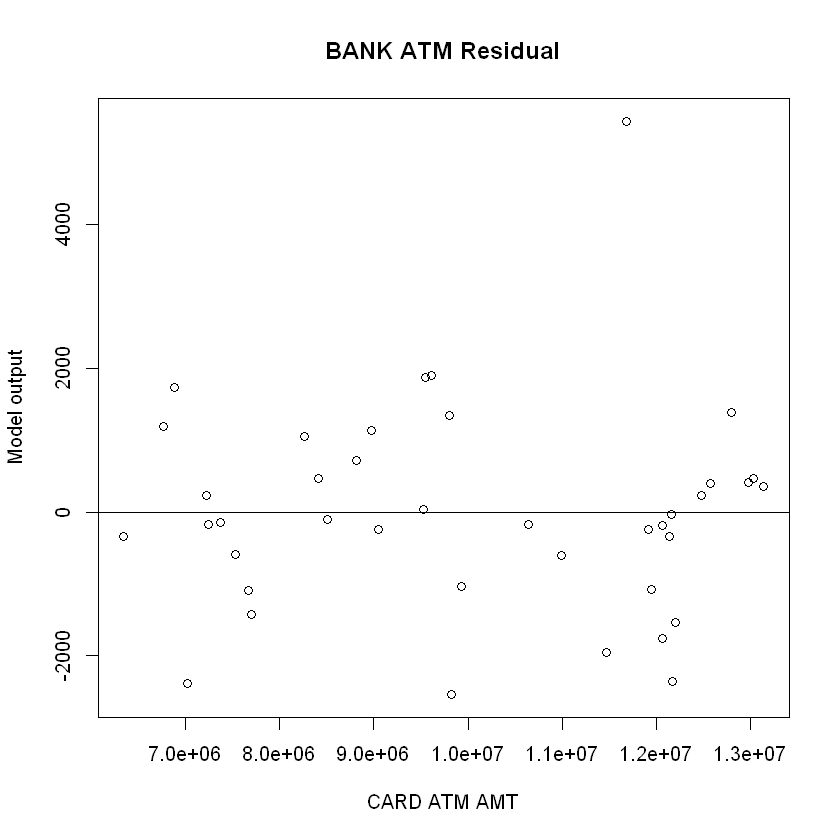

In [8]:
## Plotting Residual for Model 2
vResidual2 <- resid(m_train2)
plot(BANK_train$ATM_MACHINE + BANK_train$ATM_TRAN, vResidual2, 
     xlab = "CARD ATM AMT", ylab = "Model output",
     main = "BANK ATM Residual")
abline(0,0)

In [17]:
## QQ Plot for Model 1
qqPlot(m_train1, main="QQ Plot Model 1")

## QQ Plot for Model 2
qqPlot(m_train2, main="QQ Plot Model 2")
#####################

ERROR: Error in eval(expr, envir, enclos): could not find function "qqPlot"


ERROR: Error in eval(expr, envir, enclos): could not find function "qqPlot"


In [19]:
## Fitted values
x<-fitted(m_train2,BANK_test)
class(x)
summary(x)
v_check <- data.frame(BANK_test$ATM_AMT, 
                      x, 
                      ((c(BANK_test$ATM_AMT - x)/BANK_test$ATM_AMT)*100))
head(v_check)
head(fitted.values(m_train2,BANK_test))
#####################

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19620   24860   26790   29210   32940   41680 

,BANK_test.ATM_AMT,x,X..c.BANK_test.ATM_AMT...x..BANK_test.ATM_AMT....100.
1,41423.33,24716,40.33315
2,42535.13,24900.01,41.46014
3,44041.93,24367.64,44.67173
4,41095.87,24737.57,39.8052
5,41945.48,24929.02,40.56805
6,42361.25,25360.12,40.13369


1        2        3        4        5        6 
24716.00 24900.01 24367.64 24737.57 24929.02 25360.12

In [20]:
## Predict the ATM amount based on Test dataset
v_predict <- abs(predict(m_train2,BANK_test))
summary(v_predict)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  41110   41880   42080   42710   44030   44850 

In [21]:
v_final <- data.frame(BANK_test,v_predict)
head(v_final)
v_check <- data.frame(v_predict, 
                      (c(BANK_test$ATM_AMT - v_predict)/BANK_test$ATM_AMT)*100,
                      abs(round(((c(BANK_test$ATM_AMT - v_predict)/BANK_test$ATM_AMT)*100))))
colnames(v_check) <- c("PREDICTED_VALUE","DIFF_PERCENTAGE","ABS_DIFF")
names(v_check)
i<-1
for (i in length(v_check)) {
        if(abs(v_check$DIFF_PERCENTAGE[i]) <= 5) {
                v_check$DIFFERENCE <- 0
        }else {
                v_check$DIFFERENCE <- 1
        }
}
v_FinalOutput <- data.frame(BANK_test,v_check$PREDICTED_VALUE,v_check$DIFFERENCE)
colnames(v_FinalOutput)[5] <- "PREDICTED ATM AMOUNT"
colnames(v_FinalOutput)[6] <- "PREDICTION (0:Prediction with maximum 5% error)"
v_FinalOutput

,ATM_MACHINE,ATM_AMT,TOTAL_CARDS,ATM_TRAN,v_predict
41,6642,41423.33,13429748,13138728,41839.07
42,6628,42535.13,13165481,13520109,42271.52
43,6657,44041.93,14404106,13322780,42133.32
44,6695,41095.87,14453934,12408775,41114.42
45,6618,41945.48,17110025,12892173,41429.55
46,6631,42361.25,17567747,13300420,42002.5


[1] "PREDICTED_VALUE" "DIFF_PERCENTAGE" "ABS_DIFF"

,ATM_MACHINE,ATM_AMT,TOTAL_CARDS,ATM_TRAN,PREDICTED ATM AMOUNT,PREDICTION (0:Prediction with maximum 5% error)
41,6642,41423.33,13429748,13138728,41839.07,0
42,6628,42535.13,13165481,13520109,42271.52,0
43,6657,44041.93,14404106,13322780,42133.32,0
44,6695,41095.87,14453934,12408775,41114.42,0
45,6618,41945.48,17110025,12892173,41429.55,0
46,6631,42361.25,17567747,13300420,42002.5,0
47,6735,41384.78,17939391,13000369,42027.91,0
48,7020,45272.64,19448862,14277259,44780.75,0
49,7023,45533.14,19748769,14143158,44621.13,0
50,6888,48140.91,16221036,14738478,44851.25,0
